In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

$
Naive \ Bayes \ for \ discriminant \ value
$

In [54]:
data = pd.read_excel("example.xlsx")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
test_X = [0, 2]
prior = []
for i in np.unique(y):
    prior.append(len(y[y == i]) / len(y))
likelihoods = []
for i, val in enumerate(prior):
    likelihood = 1
    for k in range(X.shape[1]):
        foo = X[:, k][np.where(y == i)]
        likelihood *= (len(foo[foo == test_X[k]]) / len(foo))
    likelihoods.append(likelihood)
result = np.argmax(np.array(likelihoods) * np.array(prior))

$
Gausian \ Naive \ Bayes \ for \ continuos \ values
$

In [55]:
data = pd.read_csv("Breast_cancer_data.csv")
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


<Axes: >

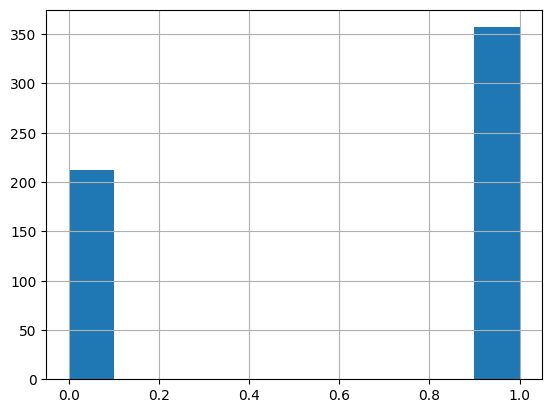

In [56]:
data["diagnosis"].hist()

In [57]:
corr = data.iloc[:, :-1].corr('pearson')
corr

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000


In [58]:
data = data[["mean_radius", "mean_texture", "mean_smoothness", "diagnosis"]]
data.head()

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0


<Axes: xlabel='mean_smoothness', ylabel='Count'>

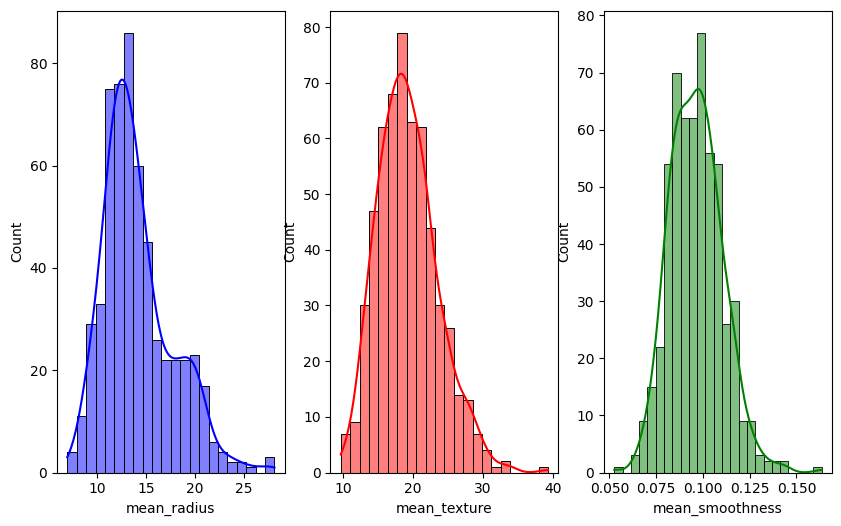

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(10, 6))
sns.histplot(data = data["mean_radius"], ax=axes[0], kde=True, color = 'b')
sns.histplot(data = data["mean_texture"], ax=axes[1], kde=True, color = 'r')
sns.histplot(data = data["mean_smoothness"], ax=axes[2], kde=True, color = 'g')

In [60]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((455, 3), (114, 3))

In [61]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

In [62]:
prior = []
for i in np.unique(y_train):
    prior.append(len(y_train[y_train == i]) / len(y_train))
prior

[0.37142857142857144, 0.6285714285714286]

In [63]:
def gaussian_function(x, std, mean):
    return np.exp((-1/2) * ((x - mean)/std)**2) / (std * np.sqrt(2 * np.pi))

In [64]:
res = []
for index, row in enumerate(X_test):
    row = row.reshape(1, 3)
    likelihoods = []
    for i, val in enumerate(prior):
        likelihood = 1
        for k in range (X_train.shape[1]):
            foo = X_train[:, k][np.where(y_train == i)]
            print(foo)
            mean, std = np.mean(foo), np.std(foo)
            likelihood *= gaussian_function(row[:,k], std, mean)
        likelihoods.append(likelihood)
    res.append(np.argmax(np.array(likelihoods).reshape(-1,1) * np.array(prior).reshape(-1,1)))

[21.09 14.54 19.89 21.1  14.87 19.27 17.99 15.22 15.34 14.45 19.81 13.4
 17.75 20.58 15.28 15.1  22.27 19.4  15.13 13.82 17.35 16.11 18.49 13.71
 15.46 19.21 18.81 17.14 19.07 19.16 19.8  13.61 11.84 14.71 16.65 16.13
 21.75 14.27 15.06 27.22 21.16 20.16 12.45 18.65 15.61 14.68 11.42 17.06
 14.58 12.83 20.48 14.86 17.47 12.34 20.09 17.95 16.69 16.35 14.25 17.3
 20.59 16.27 17.29 18.03 11.76 14.99 19.18 11.8  25.73 24.63 17.46 19.44
 20.47 20.18 24.25 23.29 20.34 20.44 18.82 21.71 15.75 18.22 19.53 19.79
 15.05 19.59 20.64 17.08 20.51 23.27 18.22 18.08 15.66 18.01 19.   17.91
 13.17 14.78 16.24 18.46 18.31 19.17 16.74 15.3  20.26 15.75 16.25 10.95
 15.46 15.49 19.4  19.45 20.29 19.55 14.9  13.61 17.42 13.43 13.86 13.17
 17.02 15.5  18.45 18.61 17.05 20.31 19.59 18.31 14.95 14.25 12.77 13.
 12.68 19.53 13.73 17.68 13.44 11.08 18.77 23.21 17.01 28.11 27.42 16.6
 17.54 19.19 13.28 14.22 15.53 13.11 19.55 20.57 15.12 16.13 20.2  15.37
 23.51 15.85 20.92 19.73 14.6  19.68 14.42 21.37 19.02 1

In [65]:
accuracy_score(res, y_test)

0.9473684210526315

In [66]:
confusion_matrix(res, y_test)

array([[39,  2],
       [ 4, 69]], dtype=int64)